In [1]:
#Import Python Libraries
#------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read Books.csv and Analyze
#------------------------------

books = pd.read_csv('Books.csv', sep=',', error_bad_lines=False, usecols=[2,3,4,5,6],encoding="latin-1")

print("Books.csv shape::", books.shape)
print("Books.csv columns:: ", books.columns)
print("Number of Unique Books::",(books.bookISBN.unique().size))

books.head()

Books.csv shape:: (3000, 5)
Books.csv columns::  Index(['bookISBN', 'bookName', 'author', 'yearOfPublication', 'publisher'], dtype='object')
Number of Unique Books:: 3000


,bookISBN,bookName,author,yearOfPublication,publisher
0,1551669382,Enchanted Afternoon,Susan Wiggs,2002,Mira
1,0743202961,Every Breath You Take : A True Story of Obsess...,Ann Rule,2001,Free Press
2,067151699X,The HIDDEN LIFE OF DOGS,Elizabeth Marshall Thomas,1995,Pocket
3,0804108528,Inadmissible Evidence,Philip Friedman,1993,Ivy Books
4,0061094145,"The Fifth Dominion (Imajica, Book 1)",Clive Barker,1995,HarperTorch


In [3]:
#Read Users.csv and Analyze
#------------------------------
users = pd.read_csv('Users.csv', sep=',', error_bad_lines=False, usecols=[2,3,4], encoding="latin-1")
print("Users.csv shape::", users.shape)
print("Users.csv columns:: ", users.columns)
print("Number of Unique Users::",(users.user.unique().size))

users.head()

Users.csv shape:: (1000, 3)
Users.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Number of Unique Users:: 1000


,user,location,age
0,43157.0,"windsor, ontario, canada",22.0
1,99032.0,"white plains, new york, usa",25.0
2,42883.0,"the woodlands, texas, usa",51.0
3,183800.0,"quebec, quebec, canada",29.0
4,188796.0,"toronto, ontario, canada",NaN


In [4]:
#Read UserEvents.csv and Analyze
#------------------------------
ratings = pd.read_csv('UserEvents.csv', sep=',', error_bad_lines=False, usecols=[1,2,3], encoding="latin-1")

print("UserEvents.csv shape::", users.shape)
print("UserEvents.csv columns:: ", users.columns)
print("Number of Unique users: ",ratings.user.unique().size)
print("Number of Unique books: ",ratings.bookId.unique().size)

ratings.head()

UserEvents.csv shape:: (1000, 3)
UserEvents.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Number of Unique users:  13030
Number of Unique books:  11234


,user,bookId,impression
0,276747,0060517794,checkout
1,276747,0671537458,checkout
2,276747,0679776818,add to cart
3,276822,0060096195,checkout
4,276822,0375821813,checkout


After analyzing all 3 input files. It can be seen that the number of unique users and movies are much more in UserEvents file than books and users file. It is safe to assume that not all users/books are present in books and users file. So its best to ignore these two files for our model and use Collaborative Filtering Technique to focus on User Events to build recommendation system 

In [5]:
#Lets analyze UserEvents file to check most popular books
#------------------------------
print("Most popular books::")
usersperbook=ratings.bookId.value_counts()
usersperbook.head(10)


Most popular books::


0316666343    438
0385504209    339
0971880107    270
0312195516    246
059035342X    227
0142001740    221
0679781587    210
0060928336    207
0446672211    200
0671027360    190
Name: bookId, dtype: int64

In [6]:
print("Most Active users::")
booksperuser=ratings.user.value_counts()
booksperuser.head(10)

Most Active users::


11676     2803
98391      790
153662     498
16795      432
95359      378
114368     378
104636     303
123883     285
35859      281
204864     270
Name: user, dtype: int64

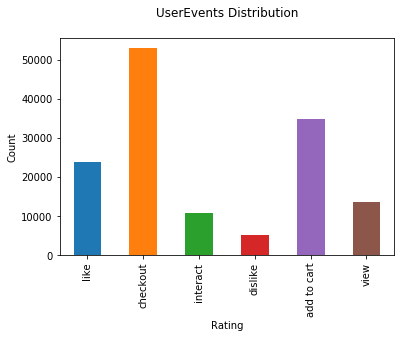

In [7]:
#Visualizing UserEvents data
#-------------------------------
ratings.impression.value_counts(sort=False).plot(kind='bar')
plt.title('UserEvents Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
#Convert UserEvents.impression feature to numeric values/ratings. 
#Checkout value has highest rating and dislike has lowest
#-----------------------------------------------------------------
ratings["impression"]=ratings["impression"].map({"dislike":1,"view":2,"interact":3,"like":4,"add to cart":5,"checkout":6})

In [9]:
average_rating = pd.DataFrame(ratings.groupby('bookId')['impression'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('bookId')['impression'].count())
average_rating.sort_values('ratingCount', ascending=False).head(20)



,impression,ratingCount
bookId,,
0316666343,5.061644,438
0385504209,5.227139,339
0971880107,1.996296,270
0312195516,5.077236,246
059035342X,5.511013,227
0142001740,5.176471,221
0679781587,5.223810,210
0060928336,4.801932,207
0446672211,5.000000,200


In [10]:
#Convert Data Frame to Pivot Matrix (USERS X BOOKS), fill NA with 0
#------------------------------------------------------------------
ratings_pivot = ratings.pivot(index='user', columns='bookId', values="impression").fillna(0)
print(ratings_pivot.shape)
ratings_pivot.head(20)



(13030, 11234)


bookId,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
user,,,,,,,,,,,,,,,,,,,,,
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ratings_pivot.values

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#Extract Users and Books as a list to be used later when converting Matrix back to Data Frame output
#--------------------------------------------------------------------------------------------------
user_list=list(ratings_pivot.index)
book_list=list(ratings_pivot.columns)

In [13]:
from scipy.sparse import coo_matrix

R = coo_matrix(ratings_pivot.values)

print ("R Shape::", R.shape)
print ("R Columns::", R.col)
print ("R Rows::",R.row)


R Shape:: (13030, 11234)
R Columns:: [   0 1487 1495 ... 2833 4229 7226]
R Rows:: [    0     1     1 ... 13029 13029 13029]


In [14]:
print(R)

  (0, 0)	2.0
  (1, 1487)	5.0
  (1, 1495)	5.0
  (1, 1812)	4.0
  (1, 5358)	6.0
  (1, 5684)	1.0
  (2, 5259)	6.0
  (2, 5313)	6.0
  (2, 5316)	5.0
  (2, 5891)	5.0
  (2, 7306)	6.0
  (2, 7753)	6.0
  (3, 6187)	5.0
  (4, 6869)	6.0
  (4, 10937)	5.0
  (4, 10954)	6.0
  (4, 11064)	5.0
  (5, 308)	6.0
  (5, 428)	4.0
  (5, 1786)	6.0
  (5, 1817)	6.0
  (5, 1844)	4.0
  (5, 2736)	6.0
  (5, 3485)	3.0
  (5, 3690)	4.0
  :	:
  (13025, 11170)	2.0
  (13025, 11194)	2.0
  (13026, 5946)	5.0
  (13026, 6389)	3.0
  (13026, 8994)	5.0
  (13026, 9063)	6.0
  (13027, 130)	6.0
  (13027, 245)	4.0
  (13027, 1068)	5.0
  (13027, 1253)	6.0
  (13027, 3435)	5.0
  (13027, 3955)	6.0
  (13027, 4572)	4.0
  (13027, 6848)	5.0
  (13027, 7396)	5.0
  (13027, 8314)	5.0
  (13027, 9282)	6.0
  (13027, 9444)	5.0
  (13028, 4426)	2.0
  (13028, 4836)	2.0
  (13028, 10193)	2.0
  (13028, 10472)	5.0
  (13029, 2833)	4.0
  (13029, 4229)	4.0
  (13029, 7226)	5.0


In [15]:
#Performs matrix factorization of the original user item matrix

#from sklearn.metrics.pairwise import cosine_similarity
#from scipy.sparse.linalg import svds

#P, sigma, Q = svds(R,k=3)

#sigma = np.diag(sigma)
#sigma.shape

In [16]:
#  Factor matrix shape
M,N=R.shape

# No of Factors - 3
K=3

# using random values of P and Q 
P=np.random.rand(M,K)
Q=np.random.rand(K,N)


In [17]:
#Computing Total Mean Squared Error
#--------------------------------
from numpy.linalg import norm

def error(R,P,Q,lamda=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0 
    for ui in range(len(ratings)):
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e

In [18]:
error(R,P,Q)

2442964.889398527

In [19]:
rmse = np.sqrt(error(R,P,Q)/len(R.data))

In [20]:
rmse

4.161255172229408

In [21]:
def SGD(R, K, lamda=0.02,steps=10, gamma=0.001):
    
    M,N = R.shape
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)
    
    rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
    print("Initial RMSE: "+str(rmse))
    
    for step in range(steps):
        for ui in range(len(R.data)):
            rui=R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui>0:
                eui=rui-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
                Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
        rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
        if rmse<0.5:
            break
    print("Final RMSE: "+str(rmse))
    return P,Q

In [22]:
#100 iterations will run for 10-15mins, gamma and lamda values can be modifed in order to optimize the model.
#-----------------------------------------------------------------------------------------------------
P,Q=SGD(R,K=3,gamma=0.0007,lamda=0.01, steps=100)

Initial RMSE: 4.1457601228126935
Final RMSE: 1.1243190882608676


In [23]:
#all_user_predicted_ratings = np.dot(np.dot(P, sigma), Q) 
all_user_ratings =np.matmul(P, Q)

all_user_ratings

array([[1.59605552, 1.76594416, 2.01831601, ..., 1.66468171, 1.81031165,
        1.91452429],
       [4.25744424, 4.82052194, 4.55462737, ..., 2.80753994, 4.18841899,
        4.13658133],
       [5.82666695, 6.39161998, 7.2635383 , ..., 5.87875832, 6.54772292,
        6.7255896 ],
       ...,
       [5.17944386, 5.74394175, 6.13358257, ..., 4.58723866, 5.56523288,
        5.64014969],
       [2.81590483, 3.02411021, 3.427071  , ..., 2.68556586, 3.12172067,
        2.99794602],
       [4.04785559, 4.37044289, 4.7805528 , ..., 3.57281889, 4.37366327,
        4.14694455]])

In [24]:
#Converting the reconstructed matrix back to dataframe
# Rounding off to 4 digits instead of default 6 so that output.csv file is less than 1GB
all_user_ratings_df = pd.DataFrame(np.round(all_user_ratings,4),columns=book_list, index=user_list)
all_user_ratings_df.shape

(13030, 11234)

In [25]:
all_user_ratings_df.head(10)

,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
8,1.5961,1.7659,2.0183,1.9286,1.8815,0.9148,1.5937,1.3251,1.7627,1.5162,...,1.8723,1.7650,1.8564,1.1398,1.2784,1.8178,1.4135,1.6647,1.8103,1.9145
99,4.2574,4.8205,4.5546,3.4586,4.7961,2.1589,4.1620,2.6195,3.9391,3.1878,...,5.1716,4.3650,4.0374,3.5407,2.5312,4.8021,4.0438,2.8075,4.1884,4.1366
114,5.8267,6.3916,7.2635,6.8430,6.7051,3.2741,5.9346,4.6209,6.2450,5.3280,...,6.8616,6.3644,6.7028,4.1224,4.5834,6.6734,5.0913,5.8788,6.5477,6.7256
232,3.4029,3.7386,4.0549,3.6203,3.8284,1.8404,3.4809,2.4644,3.4493,2.8912,...,4.0485,3.6296,3.7196,2.4924,2.4860,3.8986,3.0067,3.0669,3.6849,3.6701
242,5.1545,5.7414,6.1887,5.5596,5.9771,2.8402,5.1217,3.9077,5.3820,4.5482,...,6.1174,5.5610,5.6351,3.8718,3.7814,5.8556,4.6654,4.7277,5.5935,5.7861
243,4.6848,5.1999,5.6177,5.0428,5.3928,2.5706,4.6898,3.5156,4.8590,4.0989,...,5.5626,5.0413,5.1253,3.4949,3.4370,5.3335,4.2138,4.2851,5.0838,5.2112
244,4.6762,5.2919,5.4885,4.7730,5.5193,2.5629,4.5097,3.5036,4.8572,4.0916,...,5.5726,5.0275,4.9336,3.6868,3.2706,5.2636,4.3738,4.0337,4.9581,5.2381
254,4.9564,5.4963,5.9105,5.2705,5.6781,2.7044,4.9756,3.6694,5.0976,4.2891,...,5.8927,5.3151,5.3918,3.7034,3.6052,5.6468,4.4548,4.4699,5.3559,5.4556
300,3.0498,3.3591,3.8492,3.6737,3.5613,1.7384,3.0746,2.5001,3.3393,2.8662,...,3.5801,3.3611,3.5488,2.1585,2.4413,3.4833,2.6790,3.1682,3.4581,3.6164
383,4.7297,5.1110,5.7815,5.3423,5.2307,2.5787,4.9758,3.4894,4.8385,4.0742,...,5.5999,5.0707,5.3698,3.2790,3.6359,5.4680,4.0321,4.5567,5.2529,5.1365


In [26]:
#Saving Users Ratings for Books in an output.csv for submission

# output.csv is a MXN Matrix, where M is the number of users and N is the number of products as per evaluation criteria.
# A higher rating indicates that the user is more likely to purchase a product.
#--------------------------------------------------------------
all_user_ratings_df.to_csv('output.csv', sep=',', encoding='utf-8')

In [27]:
all_user_ratings_df1=all_user_ratings_df.transpose()
all_user_ratings_df1.head()

,8,99,114,232,242,243,244,254,300,383,...,278563,278565,278582,278633,278663,278668,278694,278843,278851,278854
0002005018,1.5961,4.2574,5.8267,3.4029,5.1545,4.6848,4.6762,4.9564,3.0498,4.7297,...,4.2473,3.9566,4.6497,4.8024,3.3580,1.8981,4.6582,5.1794,2.8159,4.0479
0002251760,1.7659,4.8205,6.3916,3.7386,5.7414,5.1999,5.2919,5.4963,3.3591,5.1110,...,4.7361,4.4394,5.1365,5.4121,3.8651,2.1613,5.1909,5.7439,3.0241,4.3704
0002259001,2.0183,4.5546,7.2635,4.0549,6.1887,5.6177,5.4885,5.9105,3.8492,5.7815,...,4.7137,4.7298,5.7066,5.8018,4.0857,2.1724,5.6310,6.1336,3.4271,4.7806
0003300277,1.9286,3.4586,6.8430,3.6203,5.5596,5.0428,4.7730,5.2705,3.6737,5.3423,...,3.8070,4.2191,5.2730,5.2378,3.7025,1.8235,5.1003,5.4217,3.1546,4.2373
0006374921,1.8815,4.7961,6.7051,3.8284,5.9771,5.3928,5.5193,5.6781,3.5613,5.2307,...,4.7315,4.6405,5.3737,5.7111,4.1671,2.2372,5.4265,5.9117,3.0694,4.3808


In [30]:
# Lets display the top 5 Recommended books for User: 99
top_five_df= all_user_ratings_df1[99].sort_values(ascending=False)

In [33]:
top_five_df.head(5)

0871136791    5.6567
3453146972    5.6508
8845205118    5.6211
3404148665    5.5784
0312422156    5.5579
Name: 99, dtype: float64